In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


# File to Load 
city_data_to_load = "../code_dataset/Capitalbikesharedata_all.csv"



# Read the Data
df_bikeshare_data = pd.read_csv(city_data_to_load)
df_bikeshare_data.head()


,Bike number,Duration,End date,End station,End station number,Member type,Start date,Start station,Start station number,Year
0,W00742,1012,9/20/10 11:43,4th & M St SW,31108,Member,9/20/10 11:27,M St & New Jersey Ave SE,31208,2010
1,W00803,1487,9/20/10 12:44,1st & M St NE,31603,Member,9/20/10 12:19,Minnesota Ave Metro/DOES,31703,2010
2,W00821,387,9/20/10 13:27,27th & Crystal Dr,31009,Member,9/20/10 13:20,27th & Crystal Dr,31009,2010
3,W00833,1409,9/20/10 13:46,19th St & Pennsylvania Ave NW,31100,Member,9/20/10 13:22,5th & K St NW,31600,2010
4,W01034,1238,9/20/10 13:48,26th & S Clark St,31012,Member,9/20/10 13:28,20th & Crystal Dr,31002,2010


In [5]:
#df_cityride_data.columns
#df_city_final=df_city_data.groupby(["Start station"])
#df_startstation_counts = df_city_data["Start station"].value_counts()
#df_startstation_counts.head()
df_bikeshare_startfinal = df_bikeshare_data.groupby(["Start station"]).size().reset_index(name="Counts")
df_bikeshare_startfinal.head()


,Start station,Counts
0,10th & E St NW,1177
1,10th & Florida Ave NW,513
2,10th & G St NW,549
3,10th & K St NW,1245
4,10th & Monroe St NE,447


In [6]:
df_bikeshare_startfinal.columns

Index(['Start station', 'Counts'], dtype='object')

In [7]:
df_bikeshare_startfinal.sort_values(["Counts"])
df_bikeshare_startfinal.head()

,Start station,Counts
0,10th & E St NW,1177
1,10th & Florida Ave NW,513
2,10th & G St NW,549
3,10th & K St NW,1245
4,10th & Monroe St NE,447


In [8]:
df_bikeshare_startfinal = df_bikeshare_startfinal.sort_values("Counts",ascending=False)

In [9]:
df_bikeshare_startfinal.sort_values("Counts")

,Start station,Counts
424,Rockville Pike & Old Georgetown Rd,1
331,Livingston Rd & 3rd St SE,1
14,11th & Park Rd NW,1
152,61st St & Banks Pl NE,1
350,Mississippi Ave & 19th St SE / THEARC,1
215,Columbia Pike & S Taylor St,1
293,Grand Park & Rose Ave,1
195,Blueridge Ave & Elkins St,1
492,Westpark & Park Run Dr,1
451,South Capitol & Atlantic St SW,1


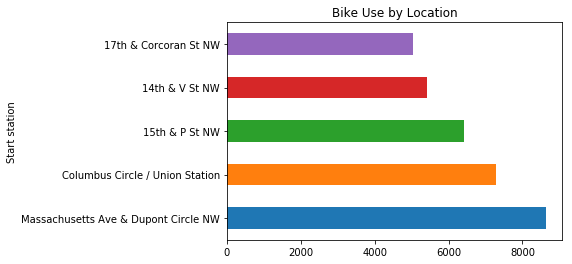

In [14]:
# Chart our data, give it a title, and label the axes
bikeshare_count_chart = df_bikeshare_startfinal.head(5).plot(x = 'Start station', y = 'Counts', kind="barh", title="Bike Use by Location", rot=0, legend=False)
plt.savefig("topFivebikeshare.png")

In [13]:
plt.savefig("topFivebikeshare.png")

<Figure size 432x288 with 0 Axes>

In [46]:
bike_location_file = "../code_dataset/Capital_Bike_Share_Locations (1).csv"
bike_location_df = pd.read_csv(bike_location_file,index_col=None, header=0)

In [47]:
bike_location_df = bike_location_df[["ADDRESS","LATITUDE","LONGITUDE"]].merge(df_bikeshare_startfinal, how='right', right_on="Start station", left_on="ADDRESS")

In [36]:
#df_cityride_data.columns
#df_city_final=df_city_data.groupby(["Start station"])
df_endstation_counts a= df_city_data["End station"].value_counts()
df_endstation_counts.tail()

#df_station_counts.to_frame(name=None)

NameError: name 'df_city_data' is not defined

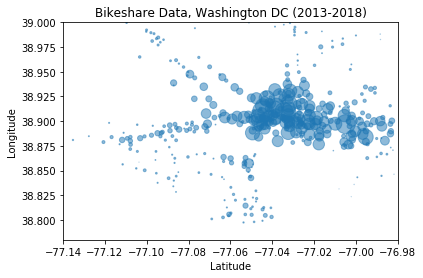

In [146]:
plt.scatter(bike_location_df['LONGITUDE'],bike_location_df['LATITUDE'],marker="o",s=bike_location_df['Counts']/20, alpha = 0.5)

plt.title("Bikeshare Data, Washington DC (2013-2018)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

plt.ylim(38.78,39)
plt.xlim(-77.14,-76.98)

plt.savefig("scatterBikeshare.png")

In [145]:
plt.savefig("scatterBikeshare.png")

<Figure size 432x288 with 0 Axes>

In [16]:
import plotly.plotly as py

In [33]:
bikeLocations = dict(
    type = 'scattergeo',
    locationmode = 'USA-states',
    lon = a['LONGITUDE'],
    lat = a['LATITUDE'],
    marker = dict(
        size = a['Counts'],
        color = "rgb(0,116,217)",
        line = dict(width=0.5, color = 'rgb(40,40,40)'),
        sizemode = 'area'
    )
)

layout = dict(
    title = 'Title',
    geo = dict(
        scope = 'usa',
        projection = dict( type = 'albers usa'),
        showland = True,
        landcolor = 'rgb(217,217,217)',
        subunitwidth=1,
        countrywidth=1,
        subunitcolor="rgb(255,255,255)",
        countrycolor="rgb(255,255,255)"
    ),
)

fig = dict(data=[bikeLocations], layout=layout)
py.iplot(fig, validate=False)

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [62]:
df_bikeshare_by_year = df_bikeshare_data.groupby(["Start station",'Year']).size().reset_index(name="Counts")


In [64]:
df_bikeshare_by_year = bike_location_df[["ADDRESS","LATITUDE","LONGITUDE"]].merge(df_bikeshare_by_year, how='right', right_on="Start station", left_on="ADDRESS")

(-77.14, -76.98)

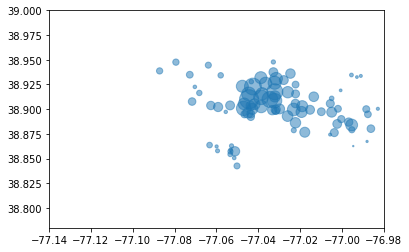

In [77]:
thingToPlot = df_bikeshare_by_year[df_bikeshare_by_year['Year'] == 2010]
plt.scatter(thingToPlot['LONGITUDE'],thingToPlot['LATITUDE'],marker="o",s=thingToPlot['Counts']/5, alpha = 0.5)
plt.ylim(38.78,39)
plt.xlim(-77.14,-76.98)

In [130]:
import matplotlib.animation as animation

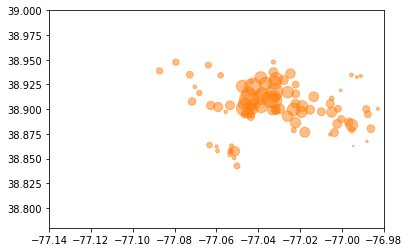

In [131]:
fig, ax = plt.subplots()
lon, lat, count = [],[],[]
ln =  plt.scatter([],[],marker="o", alpha = 0.5)

def init():
    thingToPlot = df_bikeshare_by_year[df_bikeshare_by_year['Year'] == 2010]
    scat = plt.scatter(thingToPlot['LONGITUDE'],thingToPlot['LATITUDE'],marker="o",s=thingToPlot['Counts']/5, alpha = 0.5)
    plt.ylim(38.78,39)
    plt.xlim(-77.14,-76.98)
    return scat,

def update(i):
    thingToPlot = df_bikeshare_by_year[df_bikeshare_by_year['Year'] == 2010 + i];
    scat = plt.scatter(thingToPlot['LONGITUDE'],thingToPlot['LATITUDE'],marker="o",s=thingToPlot['Counts']/5, alpha = 0.5)
    plt.ylim(38.78,39)
    plt.xlim(-77.14,-76.98)
    return scat,

a = animation.FuncAnimation(fig, update, init_func=init, frames = np.arange(8))

(<matplotlib.collections.PathCollection at 0x1143c72b128>,)

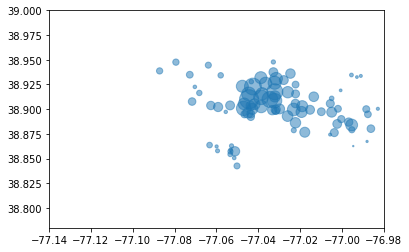

In [137]:
update(0)